In [1]:
# datasets <- strsplit('PARENT_NGSC3_DI_PBMC,SC5P_V2_HS_PBMC_10K', ",")[[1]]
# inputs <- strsplit('/usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/Parent_NGSC3_DI_PBMC_scanpy.h5ad,/usr/src/app/storage/Benchmarks/sc5pv2hsPBMC10k_1720234327721/QC/sc5p_v2_hs_PBMC_10k_scanpy.h5ad', ",")[[1]]

datasets <- strsplit('FACS KIDNEY,DROPLET KIDNEY', ",")[[1]]
inputs <- strsplit('/usr/src/app/storage/Benchmarks/facs-Kidney_1720194975000/QC/facs Kidney_Seurat.h5ad,/usr/src/app/storage/Benchmarks/droplet-Kidney_1720125625453/QC/droplet Kidney_Seurat.h5ad', ",")[[1]]

methods <- strsplit('HARMONY,SEURAT', ",")[[1]]
methods = toupper(methods)
if(length(datasets) != length(inputs)) stop("The number of datasets and files does not match.")
if(length(inputs) < 2 ) stop("Integration requires at least 2 samples.")

library(SeuratWrappers)
library(reshape2)
library(RColorBrewer)
library(dplyr)
source("../tools/formating/formating.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, 

In [2]:
default_assay = 'RNA'

srats.list <- list()
for (i in 1:length(inputs)) {
  srats.list[[datasets[i]]] <- LoadSeurat(inputs[i], project = datasets[i])
  srats.list[[datasets[i]]]@meta.data$orig.ident <- datasets[i]
  if(!default_assay %in% names(x = srats.list[[datasets[i]]])) stop(paste(default_assay, "does not exist."))
  DefaultAssay(object = srats.list[[datasets[i]]]) <- default_assay
  print(paste("Seurat object for '",datasets[datasets[i]], "' is loaded and default assay is set to", default_assay, "."))
  if(default_assay == 'RNA') srats.list[[datasets[i]]] <- NormalizeData(srats.list[[datasets[i]]], verbose = F)
  srats.list[[datasets[i]]] <- FindVariableFeatures(srats.list[[datasets[i]]], selection.method = "vst", nfeatures = 2000, verbose = F)
}
names(srats.list) <-datasets

X -> counts

Adding AnnData layers to Seurat assays

Adding AnnData embeddings to Seurat assays

Adding AnnData embeddings to Seurat assays

Adding AnnData embeddings to Seurat assays

Adding AnnData embeddings to Seurat assays



[1] "Seurat object for ' NA ' is loaded and default assay is set to RNA ."


X -> counts

Adding AnnData layers to Seurat assays

Adding AnnData embeddings to Seurat assays

Adding AnnData embeddings to Seurat assays

Adding AnnData embeddings to Seurat assays

Adding AnnData embeddings to Seurat assays



[1] "Seurat object for ' NA ' is loaded and default assay is set to RNA ."


In [ ]:
srats.list[1]$PARENT_NGSC3_DI_PBMC

In [ ]:
inputs[1]

In [ ]:
srat <- LoadSeurat(inputs[1], project = datasets[1])
srat

In [ ]:
srat[['RNA']]$counts

In [ ]:
srats.list[1]

In [ ]:
srats.list[1]$`FACS KIDNEY`[['RNA']]$counts

Loading required package: Rcpp


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5
A10.B002775.3_39_F.1.1,7.715713,4.388910,19.7415420,-0.5329683,-1.285272
A10.MAA000752.3_10_M.1.1,4.822695,2.797578,15.8328462,0.6988819,-0.614575
A11.MAA000801.3_11_M.1.1,-1.882921,-2.035482,0.9937324,-0.7648872,-5.080486
A12.MAA000801.3_11_M.1.1,-3.301927,-2.336150,-0.8864804,-0.3616958,-6.647201
A13.B001717.3_38_F.1.1,9.254719,12.932681,8.0552551,-6.8755564,-5.110126


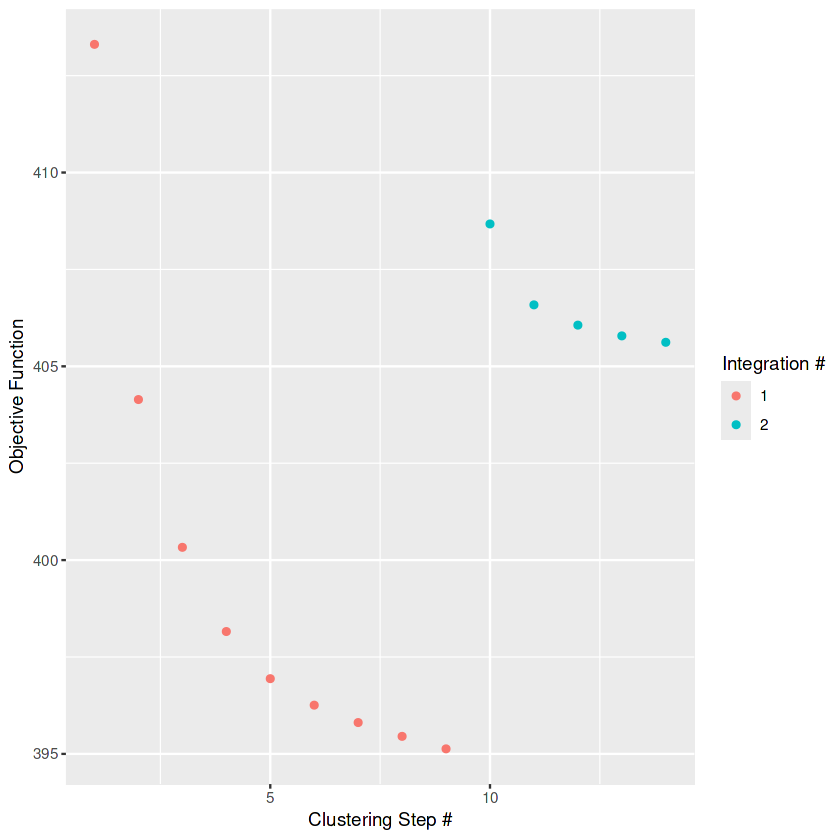

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3036
Number of edges: 55089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9065
Number of communities: 24
Elapsed time: 0 seconds


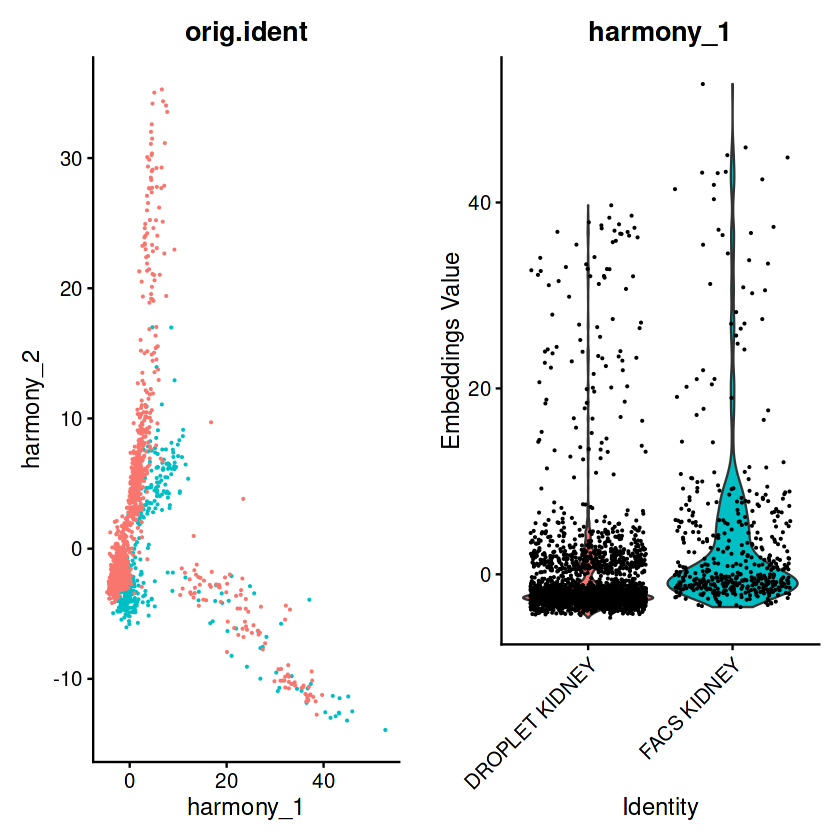

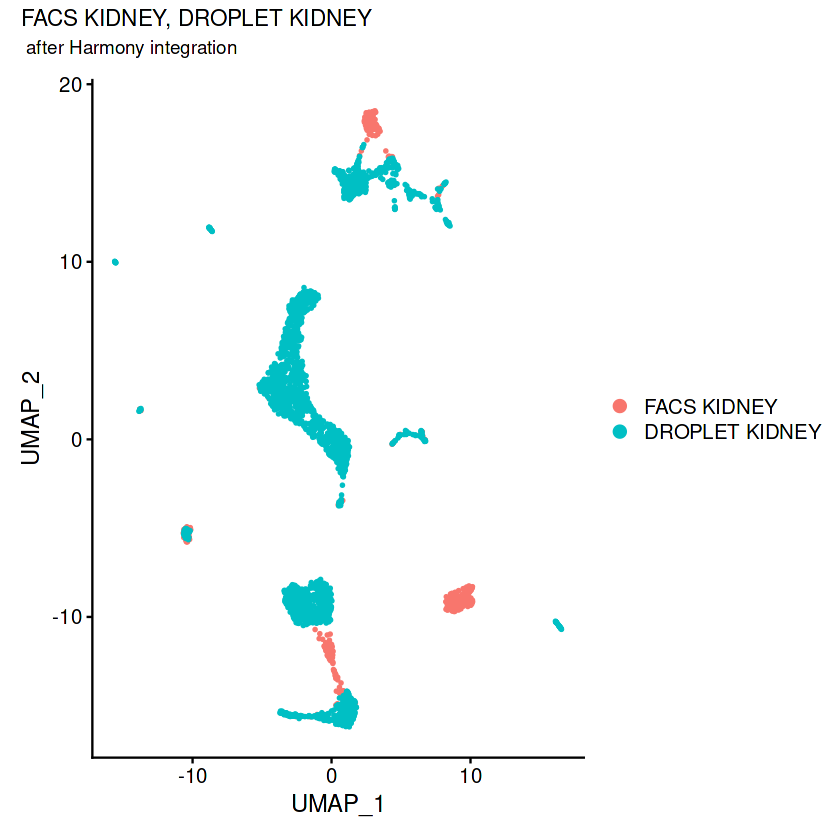

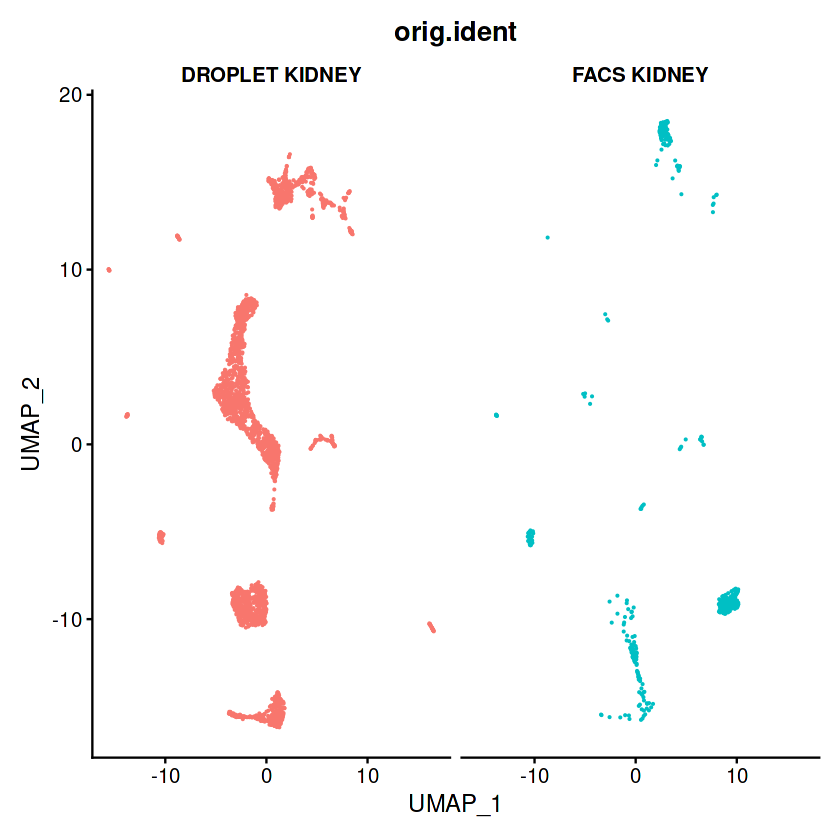

Using cluster as id variables



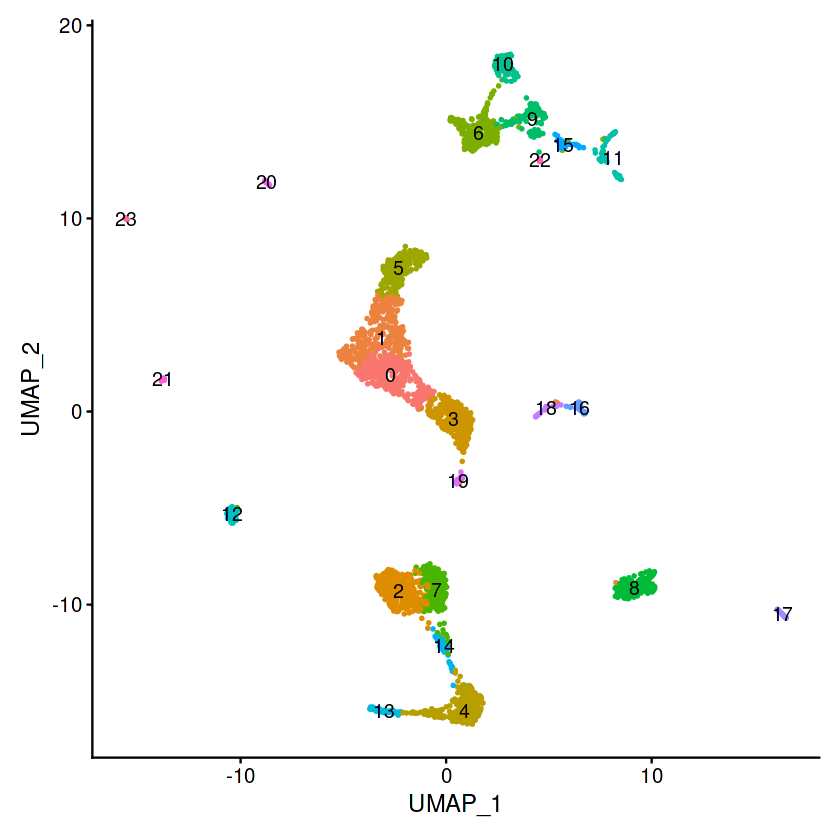

Warning message:
“Overwriting previous file /usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/integration/H_integration.h5seurat”
Creating h5Seurat file for version 3.1.5.9900



[1] "/usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/integration/H_integration.h5seurat"

[1] "Seurat object for Harmony integration is saved successfully."


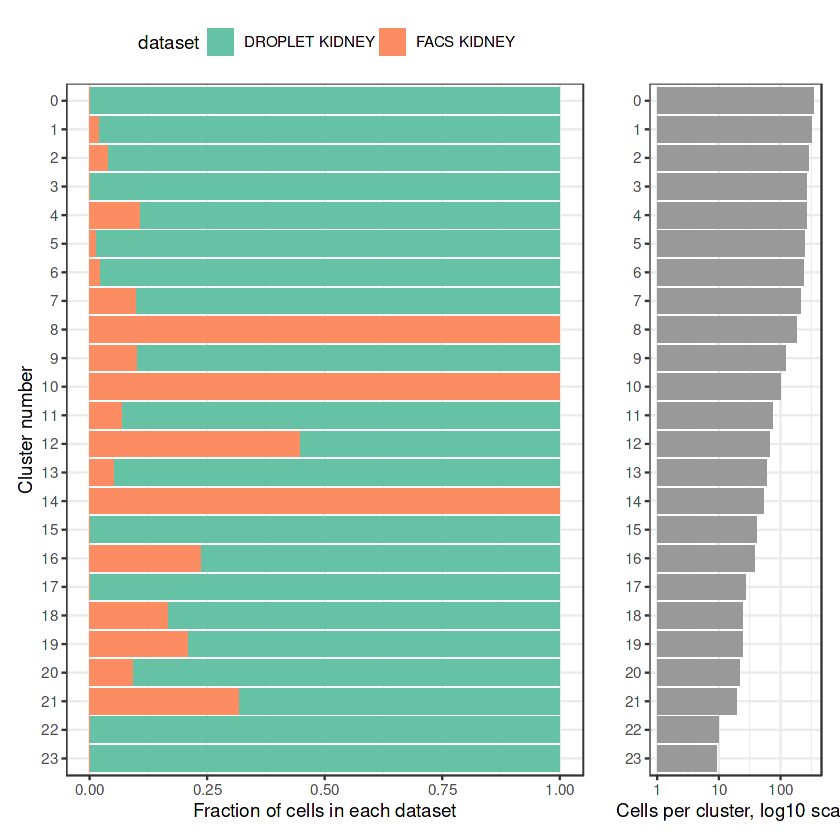

In [3]:
library(harmony)
library(cowplot)
srat.harmony <- Reduce(merge, srats.list)
srat.harmony <- NormalizeData(srat.harmony, verbose = F)
srat.harmony <- FindVariableFeatures(srat.harmony, selection.method = "vst", nfeatures = 2000, verbose = F)
srat.harmony <- ScaleData(srat.harmony, verbose = F)
srat.harmony <- RunPCA(srat.harmony, npcs = 30, verbose = F)
# srat.harmony <- RunPCA(srat.harmony, verbose = F)
srat.harmony <- RunUMAP(srat.harmony, reduction = "pca", dims = 1:30, verbose = F)
srat.harmony <- srat.harmony %>% RunHarmony("orig.ident", plot_convergence = T)
harmony_embeddings <- Embeddings(srat.harmony, 'harmony')
harmony_embeddings[1:5, 1:5]

p1 <- DimPlot(object = srat.harmony, reduction = "harmony", pt.size = .1, group.by = "orig.ident") + NoLegend()
p2 <- VlnPlot(object = srat.harmony, features = "harmony_1", group.by = "orig.ident", pt.size = .1) + NoLegend()
plot_grid(p1,p2)

srat.harmony <- srat.harmony %>% 
RunUMAP(reduction = "harmony", dims = 1:30, verbose = F) %>% 
FindNeighbors(reduction = "harmony", k.param = 10, dims = 1:30) %>% 
FindClusters() %>% 
identity()

srat.harmony <- SetIdent(srat.harmony, value = "orig.ident")
DimPlot(srat.harmony, reduction = "umap") + plot_annotation(title = paste(sapply(datasets, paste, collapse = ":"), collapse = ", "), " after Harmony integration")

DimPlot(srat.harmony, reduction = "umap", group.by = "orig.ident", pt.size = .1, split.by = 'orig.ident') + NoLegend()

srat.harmony <- SetIdent(srat.harmony, value = "seurat_clusters")
DimPlot(srat.harmony, label = T) + NoLegend()

PlotIntegratedClusters(srat.harmony)

SaveSeurat(srat.harmony, '/usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/integration/H_integration.h5seurat')
print("Seurat object for Harmony integration is saved successfully.")
# adata <- SeuratToAnndata(srat.harmony, out_file='/usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/integration/H_integration.h5ad')
# print("AnnData object for Seurat integration is saved successfully.")
# rm(adata)
# rm(srats.harmony)


In [ ]:
srat.harmony

In [4]:
adata <- SeuratToAnndata(srat.harmony, out_file='/usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/integration/H_integration.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 3036 × 3301
    obs: 'orig.ident', 'n_counts', 'n_genes', 'nCounts_RNA', 'nFeatures_RNA', 'nReads', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'percent.ercc', 'cell_ontology_class', 'percent.ribo', 'res.2.5', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class', 'channel', 'res.0.5', 'RNA_snn_res.0.8'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap', 'X_harmony'

# Seurat

In [ ]:
if("SEURAT" %in% methods) {
    srats.integrated <- NULL
    if(default_assay == 'SCT' && !is.null(12)) {
      if(!12 %in%datasets) stop(paste(12, "does not exist."))
      srats.features <- SelectIntegrationFeatures(object.list = srats.list, nfeatures = 3000) 
      srats.list <- PrepSCTIntegration(object.list = srats.list, anchor.features = srats.features, verbose = FALSE) 
      reference_dataset <- which(names(srats.list) == 12)
      srats.anchors <- FindIntegrationAnchors(object.list = srats.list, normalization.method = "SCT", anchor.features = srats.features, reference = reference_dataset)
      srats.integrated <- IntegrateData(anchorset = srats.anchors, normalization.method = "SCT")
    } else if (default_assay == 'SCT'){
      srats.features <- SelectIntegrationFeatures(object.list = srats.list, nfeatures = 3000) 
      srats.list <- PrepSCTIntegration(object.list = srats.list, anchor.features = srats.features, verbose = FALSE) 
      srats.anchors <- FindIntegrationAnchors(object.list = srats.list, normalization.method = "SCT", anchor.features = srats.features)
      srats.integrated <- IntegrateData(anchorset = srats.anchors, normalization.method = "SCT")
    } else {
      srats.anchors <- FindIntegrationAnchors(object.list = srats.list, dims = 1:30)
      srats.integrated <- IntegrateData(anchorset = srats.anchors, dims = 1:30)
    }

    # Visulization
    # Before integration
    DefaultAssay(srats.integrated) <- "RNA"
    srats.integrated <- NormalizeData(srats.integrated, verbose = F)
    srats.integrated <- FindVariableFeatures(srats.integrated, selection.method = "vst", nfeatures = 2000, verbose = F)
    srats.integrated <- ScaleData(srats.integrated, verbose = F)
    srats.integrated <- RunPCA(object = srats.integrated, verbose = FALSE) 
    srats.integrated <- RunUMAP(object = srats.integrated, dims = 1:30) 

    DimPlot(srats.integrated, reduction = "umap") + plot_annotation(title = paste(sapply(datasets, paste, collapse = ":"), collapse = ", "), " before Seurat integration")

    # After integration
    DefaultAssay(srats.integrated) <- "integrated"
    srats.integrated <- ScaleData(srats.integrated, verbose = F)
    srats.integrated <- RunPCA(object = srats.integrated, verbose = FALSE) 
    srats.integrated <- RunUMAP(object = srats.integrated, dims = 1:30) 

    DimPlot(srats.integrated, reduction = "umap") + plot_annotation(title = paste(sapply(datasets, paste, collapse = ":"), collapse = ", "), " after Seurat integration")
    DimPlot(srats.integrated, reduction = "umap", split.by = "orig.ident") + NoLegend()

    srats.integrated <- FindNeighbors(srats.integrated, dims = 1:30, k.param = 10, verbose = F)
    srats.integrated <- FindClusters(srats.integrated, verbose = F)
    DimPlot(srats.integrated, label = T) + NoLegend()

    count_table <- table(srats.integrated@meta.data$seurat_clusters, srats.integrated@meta.data$orig.ident)
    count_table

    PlotIntegratedClusters(srats.integrated) 

    SaveSeurat(srats.integrated, '/usr/src/app/storage/Benchmarks/facs-Kidney_1720194975000/QC/integration/Seurat_integration.h5seurat')
    print("Seurat object for Seurat integration is saved successfully.")
    adata <- SeuratToAnndata(srats.integrated, out_file='/usr/src/app/storage/Benchmarks/facs-Kidney_1720194975000/QC/integration/Seurat_integration.h5ad', main_layer="data", assay="integrated")
    print("AnnData object for Seurat integration is saved successfully.")
    # rm(adata)
} else {
  print("Not selected by user, skipped.")
}

In [ ]:
PlotIntegratedClusters(srats.integrated) 

In [ ]:
DimPlot(srats.integrated, reduction = "umap") + plot_annotation(title = paste(sapply(datasets, paste, collapse = ":"), collapse = ", "), " after Seurat integration")

In [ ]:
srats.integrated

In [ ]:
adata <- SeuratToAnndata(srats.integrated, out_file='/usr/src/app/storage/Benchmarks/facs-Kidney_1720194975000/QC/integration/H_integration.h5ad', main_layer="data", assay="integrated")

In [ ]:
adata

In [ ]:
adata$X

# Liger

In [ ]:
library(rliger)
srat.liger <- Reduce(merge, srats.list)
srat.liger <- NormalizeData(srat.liger)
srat.liger <- FindVariableFeatures(srat.liger)
srat.liger <- ScaleData(srat.liger, split.by = "orig.ident", do.center = F)
srat.liger <- RunOptimizeALS(srat.liger, k = 30, lambda = 5, split.by = "orig.ident") ## this one takes a while
srat.liger <- RunQuantileNorm(srat.liger, split.by = "orig.ident")
srat.liger <- FindNeighbors(srat.liger, reduction = "iNMF", k.param = 10, dims = 1:30)
srat.liger <- FindClusters(srat.liger)

srat.liger <- RunUMAP(srat.liger, dims = 1:ncol(srat.liger[["iNMF"]]), reduction = "iNMF", verbose = F)
srat.liger <- SetIdent(srat.liger,value = "orig.ident")
DimPlot(srat.liger, reduction = "umap") + plot_annotation(title = paste(sapply(datasets, paste, collapse = ":"), collapse = ", "), " after LIGER integration")
DimPlot(srat.liger, reduction = "umap", group.by = "orig.ident", pt.size = .1, split.by = 'orig.ident') + NoLegend()

srat.liger <- SetIdent(srat.liger,value = "seurat_clusters")
DimPlot(srat.liger, reduction = "umap",label = T) + NoLegend()

PlotIntegratedClusters(srat.liger)

SaveSeurat(srat.liger, '/usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/integration/H_integration.h5seurat')
print("Seurat object for LIGER integration is saved successfully.")


In [ ]:
srat.liger

In [ ]:
adata <- SeuratToAnndata(srat.liger, out_file='/usr/src/app/storage/Benchmarks/ParentNGSC3DIPBMC_1720232996987/QC/integration/H_integration.h5ad')
print("AnnData object for LIGER integration is saved successfully.")

In [ ]:
adata